## Retrieve the data from the following URL and clean the dataset:
https://www.espncricinfo.com/records/highest-career-batting-average-282910

### Calculations to Perform on the DataFrame:
1. Calculate the average career length of cricketers.
2. Compute the average batting strike rate for cricketers who played for more than 10 years.
3. Determine the number of cricketers who played before 1960.
4. Find the maximum highest innings score by country.
5. Calculate the average number of hundreds, fifties, and ducks (0 runs) by country.



### Import the required libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load the data file.

In [5]:
df = pd.read_csv('Cricket_Data.csv', na_values=['-'])
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,NaN,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1


### Rename columns with appropriate names.

In [7]:
df = df.rename(columns = {'BF': 'Balls_Faced', 'SR': 'Batting_Strike_Rate', 'HS': 'Highest_Inns_Score', 'NO': 'Not_Outs', 'Mat': 'Matches'})

In [8]:
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,NaN,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1


### Checking for Null / NaN / Missing Values

In [10]:
df.isna().any()

Player                 False
Span                   False
Matches                False
Inns                   False
Not_Outs               False
Runs                   False
Highest_Inns_Score     False
Ave                    False
Balls_Faced             True
Batting_Strike_Rate     True
100                    False
50                     False
0                       True
4s                     False
6s                     False
dtype: bool

In [11]:
df.isna().sum()[df.isna().sum() > 0]

Balls_Faced            3
Batting_Strike_Rate    3
0                      1
dtype: int64

In [12]:
df['0'] = df['0'].fillna(0)

In [13]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)
df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].fillna(0)

In [14]:
df.isna().sum()

Player                 0
Span                   0
Matches                0
Inns                   0
Not_Outs               0
Runs                   0
Highest_Inns_Score     0
Ave                    0
Balls_Faced            0
Batting_Strike_Rate    0
100                    0
50                     0
0                      0
4s                     0
6s                     0
dtype: int64

### Check for duplicates

In [16]:
print(df.duplicated().sum())

0


#### As there are no duplicates available we do not need to perform any cleaning on that part.

### Split the 'Span' column into two columns (Start and End Date).

In [19]:
df[['Start Date', 'End Date']] = df['Span'].str.split('-', expand = True)

In [20]:
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954


### Now, we can remove the 'Span' column which is not required.

In [22]:
df.drop(columns='Span', inplace = True)

In [23]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948
1,PHKD Mendis (SL),12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954


In [24]:
df['Start Date'] = df['Start Date'].astype('int')
df['End Date'] = df['End Date'].astype('int')

In [25]:
df.dtypes

Player                  object
Matches                  int64
Inns                     int64
Not_Outs                 int64
Runs                     int64
Highest_Inns_Score      object
Ave                    float64
Balls_Faced             object
Batting_Strike_Rate    float64
100                      int64
50                       int64
0                      float64
4s                      object
6s                      object
Start Date               int64
End Date                 int64
dtype: object

In [26]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948
1,PHKD Mendis (SL),12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954


### Split up the country from the 'Player' column.

In [28]:
df[['Player', 'Country_Code']] = df['Player'].str.split('(', expand = True)

In [29]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948,AUS)
1,PHKD Mendis,12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025,SL)
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016,AUS)
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970,SA)
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954,WI)


In [30]:
df['Country_Code'] = df['Country_Code'].str.replace(')', "")

In [31]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948,AUS
1,PHKD Mendis,12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025,SL
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954,WI


### Fixing the Data Types of the columns.

In [33]:
df.dtypes

Player                  object
Matches                  int64
Inns                     int64
Not_Outs                 int64
Runs                     int64
Highest_Inns_Score      object
Ave                    float64
Balls_Faced             object
Batting_Strike_Rate    float64
100                      int64
50                       int64
0                      float64
4s                      object
6s                      object
Start Date               int64
End Date                 int64
Country_Code            object
dtype: object

In [34]:
# columns to fix = [Highest_Inns_Score, Balls_Faced, 4s, 6s]

In [35]:
df['Highest_Inns_Score'].unique()

array(['334', '182*', '269*', '274', '270*', '194', '243', '256', '207',
       '317', '336*', '365*', '319', '211', '239', '220', '364', '224',
       '122', '251', '183', '227', '247*', '231', '248*', '400*', '214*',
       '280*', '270', '223', '313', '257', '201*', '232*', '195', '203*',
       '236*', '200', '262', '380', '278*', '205', '208*', '291', '278',
       '374', '329', '261', '215*', '329*', '144*', '189*', '250', '277',
       '266', '232', '127'], dtype=object)

#### We can find that few values are ending with '*'s. So we can remove those '*'s and convert the data type into 'int'.

In [37]:
df['Highest_Inns_Score'] = df['Highest_Inns_Score'].str.replace("*", "")

In [38]:
df['Balls_Faced'].unique()

array(['9800+', '1839', '2667', '1707+', '416+', '6558+', '1288+',
       '4957+', 0, '2581', '7491+', '4063+', '22882', '5363+', '19176',
       '2844+', '28903', '178+', '17913', '665+', '1823', '13079+',
       '108+', '29437+', '19753', '2738', '15164+', '31258', '14372',
       '19375', '22782', '2035+', '10636', '12436', '27395', '14184+',
       '22461', '22568', '14349', '16077', '27002+', '3345', '9613+',
       '2731+', '22959', '16345', '488+', '619+', '10441', '2445',
       '15456', '885+', '158+', '11641', '1799+', '8662+', '15525',
       '3118+', '3217+', '2110+'], dtype=object)

#### Similarly, in the 'Balls_Faced' column we can see that few values are ending with '+'s. We can fix them as well.

In [40]:
df['Balls_Faced'] = df['Balls_Faced'].str.replace('+', "")

In [41]:
df['4s'].unique()

array(['626+', '123', '186', '246+', '104+', '202+', '125+', '591+',
       '258+', '246', '419+', '593+', '1491', '276+', '1116', '107+',
       '358+', '1488', '37+', '1031', '65+', '124', '755', '115+',
       '2058+', '1559', '207', '788+', '1654', '957', '1082', '1509',
       '102+', '543', '685', '1285', '908+', '1175', '1394', '1049',
       '1024', '1161', '165', '952+', '342+', '1387', '1105', '240+',
       '38+', '1233', '148', '978', '123+', '41+', '51+', '633', '427+',
       '525+', '1165', '119+', '241+', '53+'], dtype=object)

In [42]:
df['6s'].unique()

array(['6', '23', '5', '11', '1', '4', '27', '2', '37', '32+', '51', '8',
       '61', '7', '97', '16', '69', '88', '39', '48', '21', '70', '73',
       '3', '20', '36', '26', '45', '82', '64', '28', '84', '0', '91',
       '24', '5+'], dtype=object)

#### So is the case for the columns '4s' and '6s' as well.

In [44]:
df['6s'] = df['6s'].str.replace('+', "")
df['4s'] = df['4s'].str.replace('+', "")

In [45]:
df['Balls_Faced'].fillna(0, inplace = True)

C:\Users\chanu\AppData\Local\Temp\ipykernel_23480\2470725788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Balls_Faced'].fillna(0, inplace = True)


In [46]:
df['6s'] = df['6s'].astype('int')
df['4s'] = df['4s'].astype('int')
df['Balls_Faced'] = df['Balls_Faced'].astype('int')
df['Highest_Inns_Score'] = df['Highest_Inns_Score'].astype('int')


In [47]:
df['0'] = df['0'].astype('int')

In [48]:
df.dtypes

Player                  object
Matches                  int64
Inns                     int64
Not_Outs                 int64
Runs                     int64
Highest_Inns_Score       int64
Ave                    float64
Balls_Faced              int64
Batting_Strike_Rate    float64
100                      int64
50                       int64
0                        int64
4s                       int64
6s                       int64
Start Date               int64
End Date                 int64
Country_Code            object
dtype: object

### Add a 'Career_Length' column based on the 'Star_Date' and 'End_Date' columns.

In [50]:
df['Career_Length'] = df['End Date'] - df['Start Date']

In [51]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


In [52]:
df['Career_Length'].unique()

array([20,  3,  1,  7, 24, 11,  8, 13, 10,  2, 15, 22, 12, 18, 14,  5, 16,
       17,  9, 21, 19,  6])

## Calculations on the DataFrame

### 1. Find the average career length of Cricketers. 

In [55]:
avg_career_len = df['Career_Length'].mean()

print(f'Average Career Length of Cricketers: \033[1m{avg_career_len: ,.2f} Years.\033[0m')

Average Career Length of Cricketers:  12.97 Years.


### 2. Find the Average Batting Strike Rate for cricketers who played over 10 years.

In [57]:
avg_batting_strike_rate = df[df['Career_Length']>10]['Batting_Strike_Rate'].mean()

print(f"Average Batting Strike Rate of Cricketers who played over 10 years: \033[1m{avg_batting_strike_rate: ,.2f}\033[0m")

Average Batting Strike Rate of Cricketers who played over 10 years:  47.80


### 3. Find the number of cricketers who played before 1960.

In [59]:
count_of_cricketers_played_before_1960 = df[df['Start Date'] < 1960]['Player'].count()

print(f"Number of cricketers played before 1960: \033[1m{count_of_cricketers_played_before_1960}\033[0m")

Number of cricketers played before 1960: 23


### 4. Find max Highest Inns Score by Country.

In [61]:
df.groupby('Country_Code')['Highest_Inns_Score'].max().to_frame().sort_values('Highest_Inns_Score', ascending = False)

,Highest_Inns_Score
Country_Code,
ICC/WI,400
AUS,380
SL,374
WI,365
ENG,364
ICC/PAK,329
ICC/IND,319
PAK,313
SA,278


In [62]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


### 5. Hundreds, Fifties, Ducks (0) AVG by Country.

In [64]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


In [65]:
df.groupby('Country_Code')[['100', '50', '0']].mean().round(2)

,100,50,0
Country_Code,,,
AUS,21.53,28.93,8.93
ENG,13.08,21.38,4.46
ICC/IND,29.50,47.50,12.00
ICC/PAK,25.00,46.00,15.00
ICC/SA,36.00,48.00,13.50
ICC/WI,34.00,48.00,17.00
IND,23.25,31.50,8.00
NZ,33.00,37.00,11.00
PAK,17.80,24.20,8.00


**1. Distribution of Batting Averages (Ave)**

**2. Career Length vs Batting Average**

**3. Top 10 Cricketers by Highest Innings Score**

**4. Batting Strike Rate Distribution**

**5. Number of Hundreds, Fifties, and Ducks by Country**

**6. Batting Strike Rate vs Career Length**

**7. Batting Strike Rate vs Highest Innings Score**

**8. Cricketers with the Most Hundreds, Fifties, and Ducks**

**9. Top Cricketers by Career Length**

**10. Cricketers by Start Date (Career Start Year)**

1. Distribution of Batting Averages (Ave)

In [68]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


# Data Visualization: Key Insights from the Cricket Batting Averages Dataset

### 1. Distribution of Batting Strike Rate

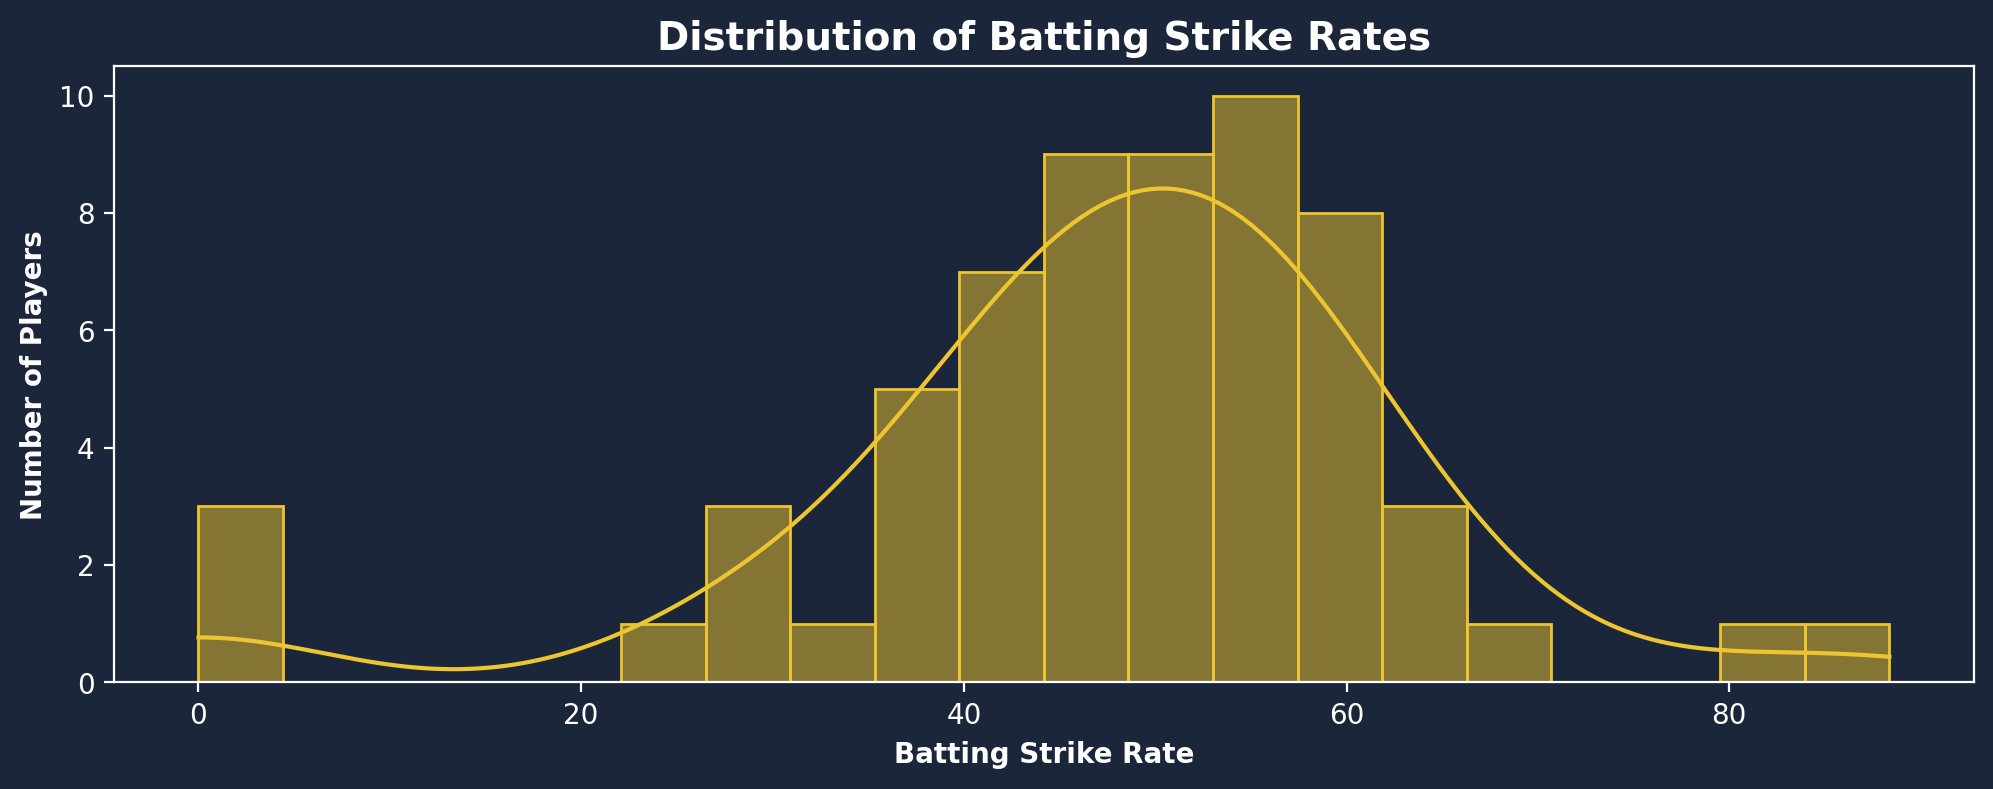

In [ ]:
plt.figure(figsize = (12, 4), dpi = 200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})

sns.histplot(data = df, x = 'Batting_Strike_Rate', bins = 20, edgecolor = '#edc531', kde = True, color = '#edc531', linecolor = 'lime')

plt.title('Distribution of Batting Strike Rates', fontsize = 14, weight = 'bold')
plt.xlabel('Batting Strike Rate', weight = 'bold')
plt.ylabel('Number of Players', weight = 'bold');

### 2. Career Length vs Batting Average

In [73]:
# Columns['Player', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'Highest_Inns_Score', 'Ave', 'Balls_Faced', 'Batting_Strike_Rate', \
#         '100', '50', '0', '4s', '6s', 'Start Date', 'End Date', 'Country_Code', 'Career_Length']

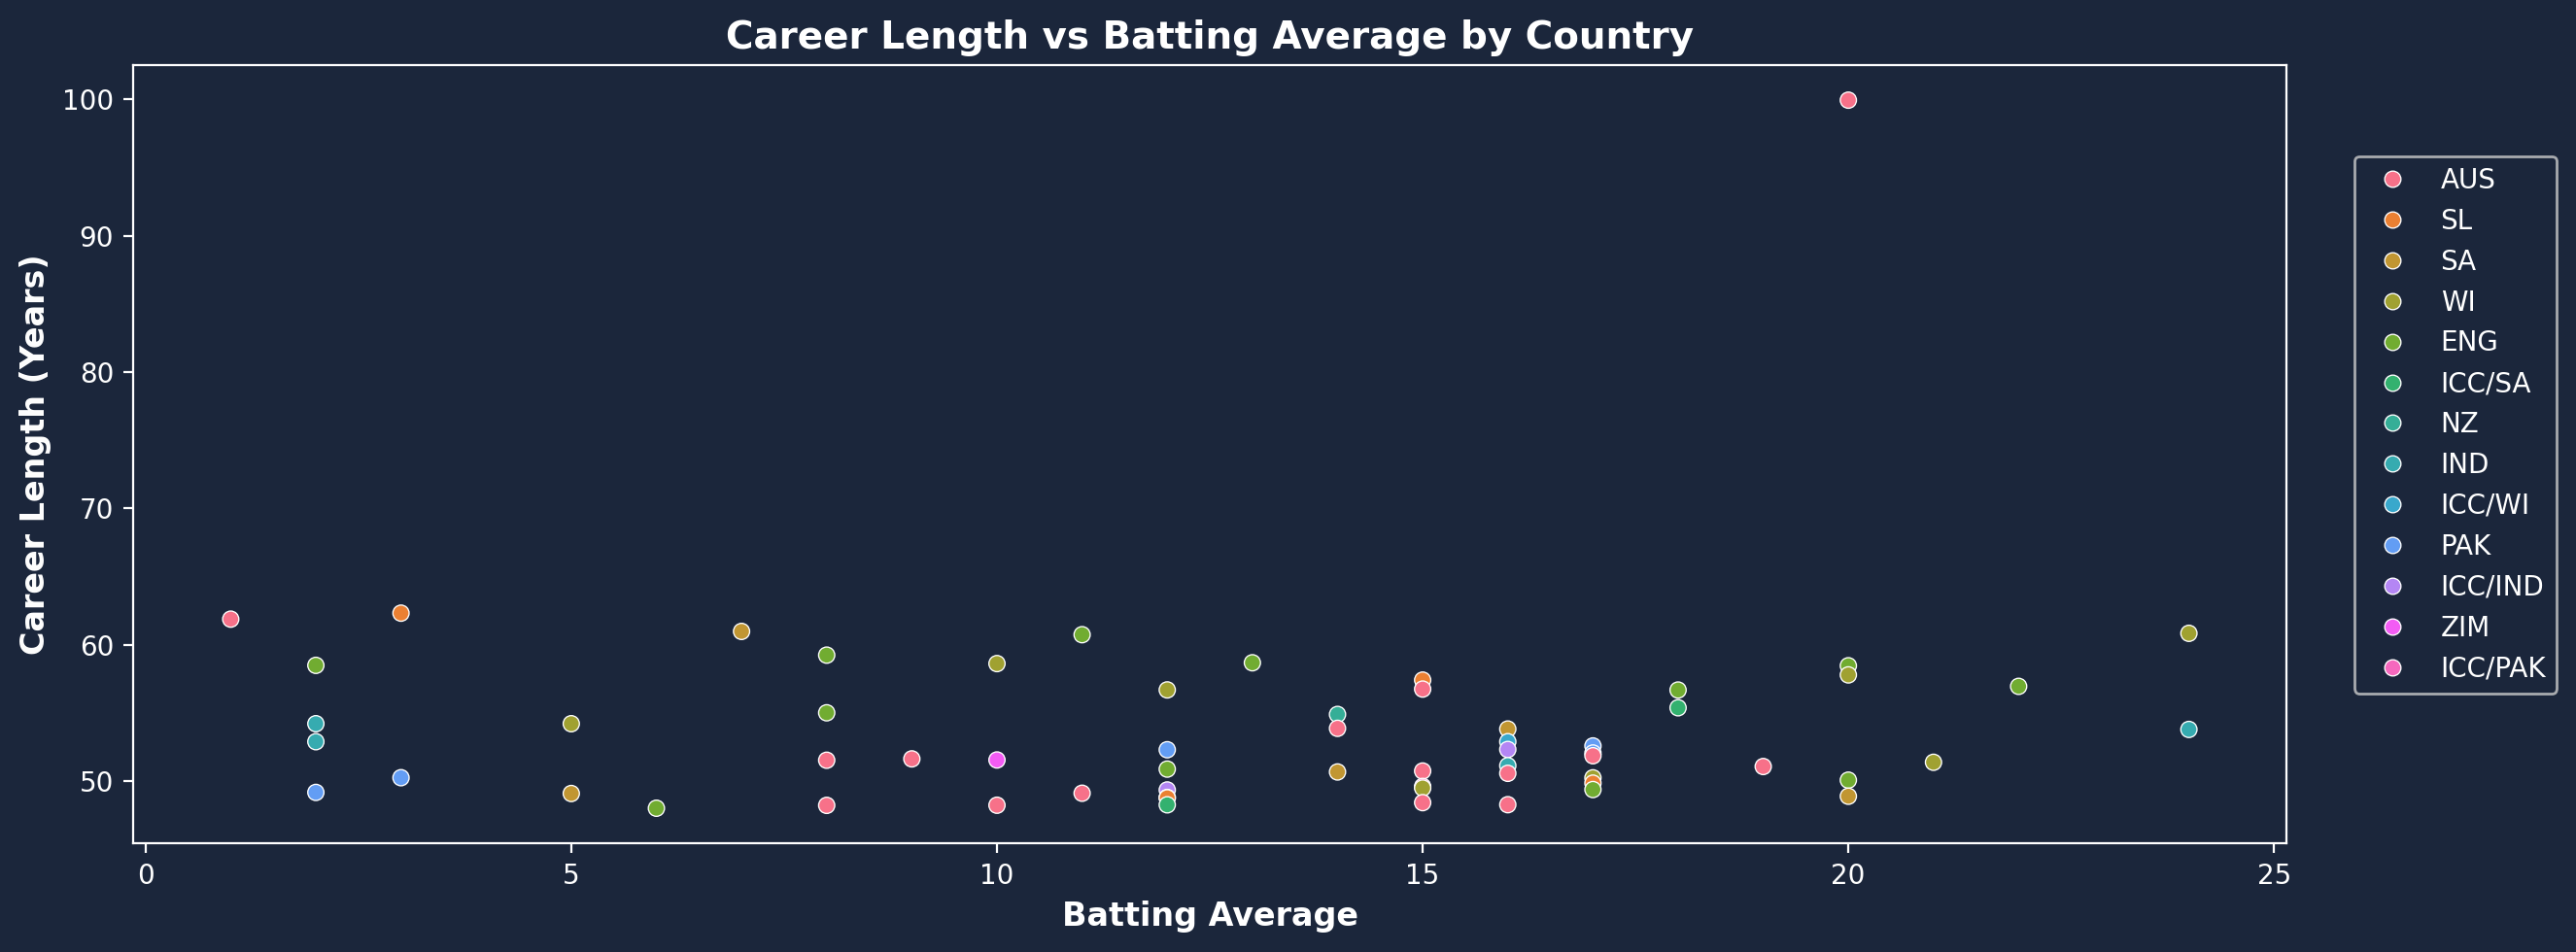

In [275]:
plt.figure(figsize=(12,5), dpi = 200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})

sns.scatterplot(data = df, x = 'Career_Length', y = 'Ave', hue = 'Country_Code')

plt.title('Career Length vs Batting Average by Country', fontsize = 14, weight = 'bold')
plt.xlabel('Batting Average', fontsize = 12, weight = 'bold')
plt.ylabel('Career Length (Years)', fontsize = 12, weight = 'bold')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.025, 0.9));

In [75]:
# Columns['Player', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'Highest_Inns_Score', 'Ave', 'Balls_Faced', 'Batting_Strike_Rate', \
#         '100', '50', '0', '4s', '6s', 'Start Date', 'End Date', 'Country_Code', 'Career_Length']

### Top 10 Players by Highest Innings Score.

In [77]:
top_10_players_by_Inns_Score = df.groupby('Highest_Inns_Score')['Player'].max().to_frame().   \
                               sort_values('Highest_Inns_Score', ascending = False).reset_index().head(10)

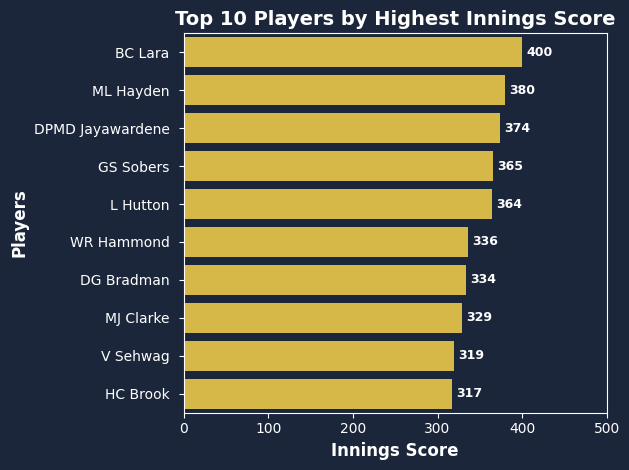

In [347]:
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})
ax = sns.barplot(data = top_10_players_by_Inns_Score, x = 'Highest_Inns_Score', y = 'Player', color = '#edc531')

for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title('Top 10 Players by Highest Innings Score', fontsize = 14, weight = 'bold')
plt.ylabel('Players', fontsize = 12, weight = 'bold')
plt.xlabel('Innings Score', fontsize = 12, weight = 'bold')

plt.xlim(0, max(top_10_players_by_Inns_Score['Highest_Inns_Score']) + 100)

plt.tight_layout();

### 4. Number of Hundreds, Fifties, and Ducks by Country


In [80]:
count_100_50_0_by_country = df.groupby('Country_Code')[['100', '50', '0']].sum()

In [81]:
count_100_50_0_by_country

,100,50,0
Country_Code,,,
AUS,323,434,134
ENG,170,278,58
ICC/IND,59,95,24
ICC/PAK,25,46,15
ICC/SA,72,96,27
ICC/WI,34,48,17
IND,93,126,32
NZ,33,37,11
PAK,89,121,40


<Figure size 1280x960 with 0 Axes>

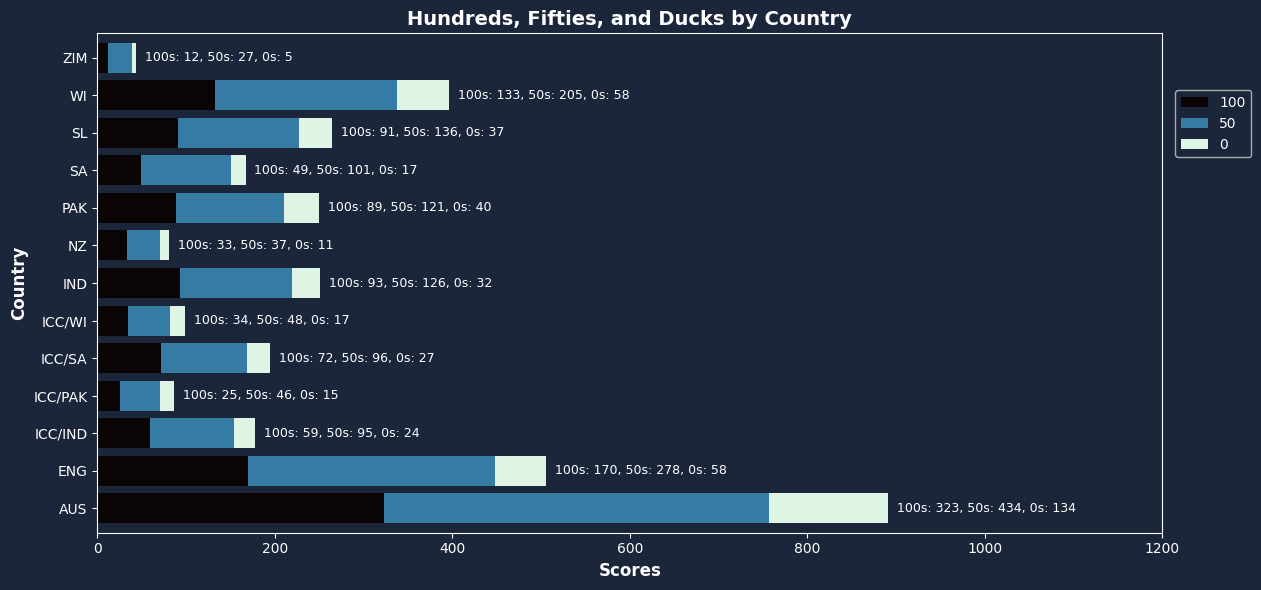

In [271]:
plt.figure(dpi = 200, facecolor = '#1b263b')

plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})

ax = count_100_50_0_by_country.plot(kind = 'barh', width = 0.8, stacked = True, cmap = 'mako', figsize = (12,6))
# fig = ax.get_figure()
# fig.set_facecolor('#1b263b')
# ax.set_facecolor('#1b263b')

for i, (country, row) in enumerate(count_100_50_0_by_country.iterrows()):
    values = row.tolist()
    label = f"100s: {values[0]:,}, 50s: {values[1]:,}, 0s: {values[2]:,}"

    total = sum(values)
    ax.text(
        total + 10,
        i,
        label,
        va = 'center',
        fontsize = 9,
    )


plt.title('Hundreds, Fifties, and Ducks by Country', fontsize = 14)
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Scores', fontsize = 12)
plt.xlim(0,1200)

plt.tight_layout();
plt.legend(bbox_to_anchor = (1.09, 0.9));

### 5. Batting Strike Rate vs Career Length

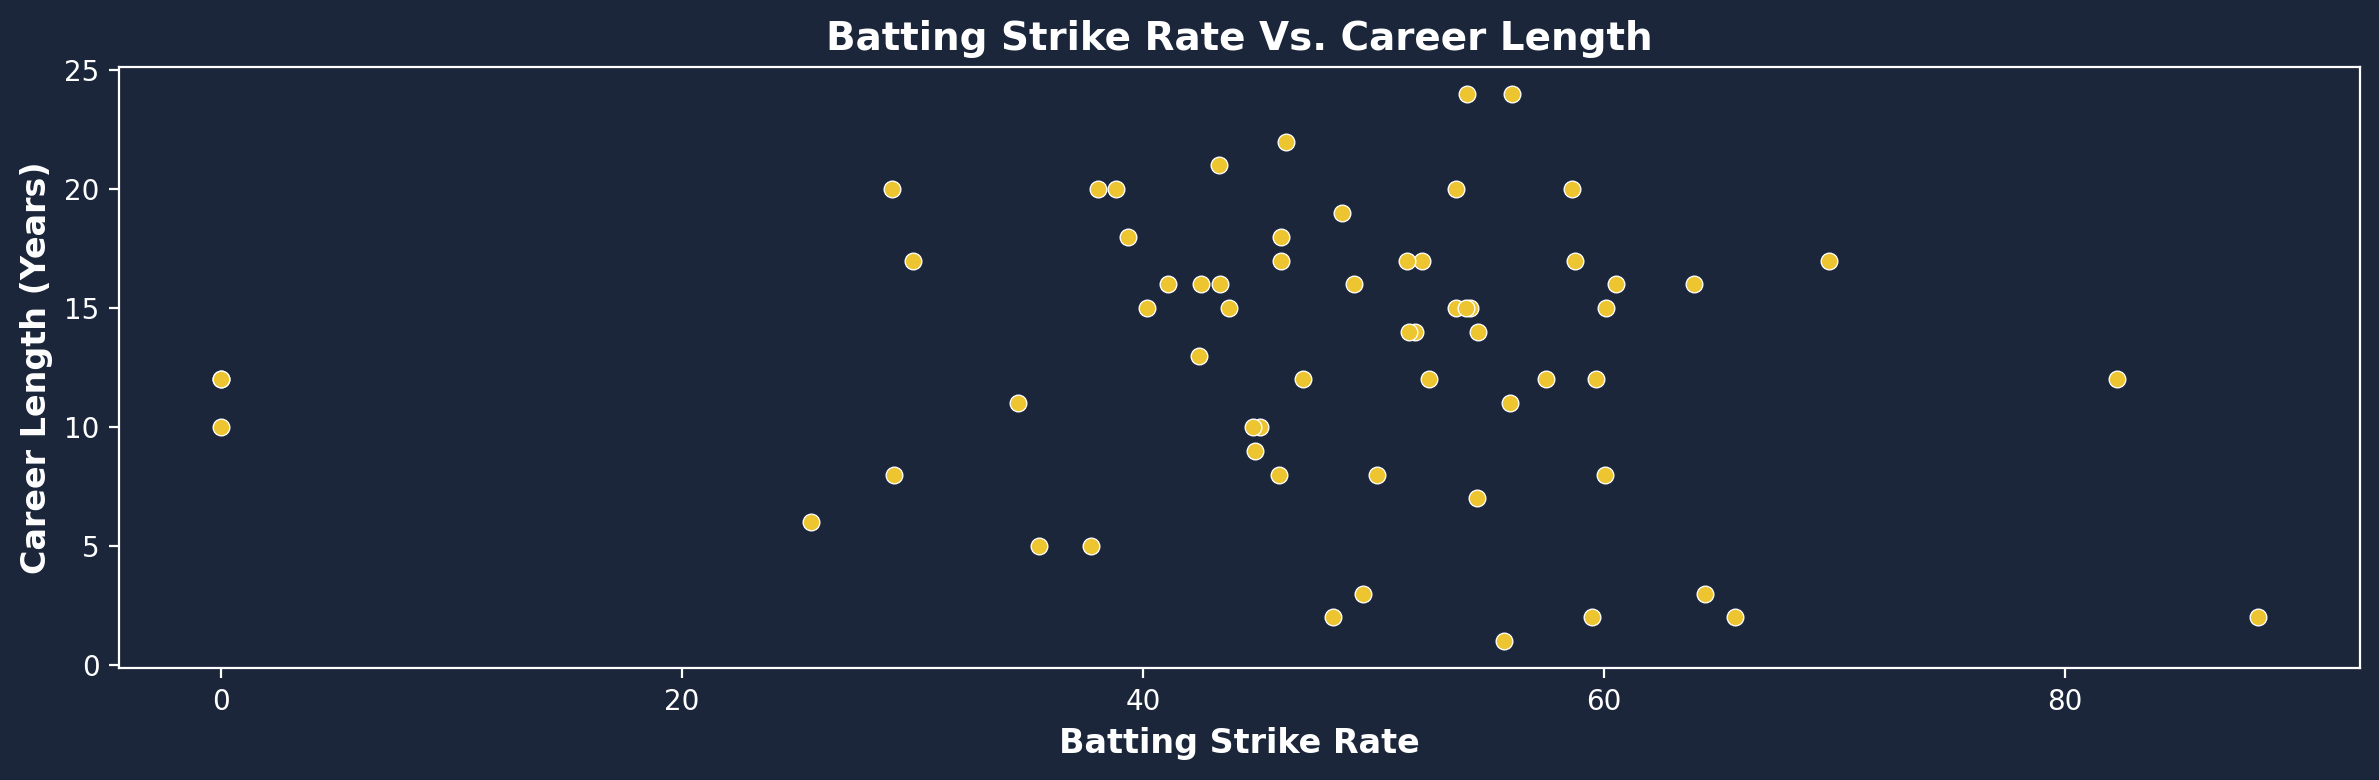

In [317]:
plt.figure(figsize=(12,4), dpi = 200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})
sns.scatterplot(data = df, x = 'Batting_Strike_Rate', y = 'Career_Length', color = '#edc531');

plt.title('Batting Strike Rate Vs. Career Length', fontsize = 14, weight = 'bold')
plt.xlabel('Batting Strike Rate', fontsize = 12, weight = 'bold')
plt.ylabel('Career Length (Years)', fontsize = 12, weight = 'bold')

plt.tight_layout();

In [85]:
# Columns['Player', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'Highest_Inns_Score', 'Ave', 'Balls_Faced', 'Batting_Strike_Rate', \
#         '100', '50', '0', '4s', '6s', 'Start Date', 'End Date', 'Country_Code', 'Career_Length']

### 6. Cricketers with the Most Hundreds, Fifties, and Ducks

In [87]:
players_with_most_100s_50s_and_Ducks = (
    df.groupby('Player')[['100', '50', '0']]
    .max()
    .sort_values(by = ['100', '50', '0'], ascending = [False, False, False])
    .head(10)
)

In [88]:
players_with_most_100s_50s_and_Ducks.T

Player,SR Tendulkar,JH Kallis,RT Ponting,KC Sangakkara,JE Root,R Dravid,SPD Smith,DPMD Jayawardene,BC Lara,SM Gavaskar
100,51,45,41,38,36,36,36,34,34,34
50,68,58,62,52,65,63,41,50,48,45
0,14,16,17,11,13,8,11,15,17,12


<Figure size 1280x960 with 0 Axes>

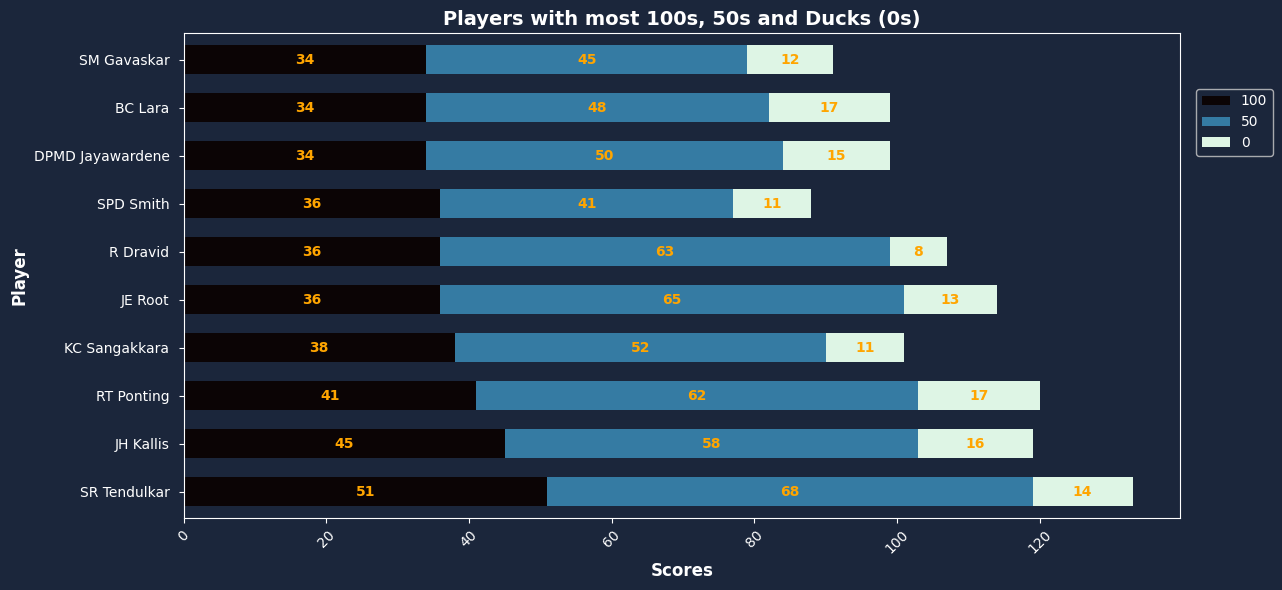

In [285]:
plt.figure(dpi = 200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})


ax = players_with_most_100s_50s_and_Ducks.plot(kind = 'barh', stacked = True, width = 0.6, cmap = 'mako', figsize = (12, 6))

for bars in ax.containers:
    ax.bar_label(bars, label_type = 'center', fmt = '%d', fontsize = 10, weight = 'bold', color = 'orange')

plt.title('Players with most 100s, 50s and Ducks (0s)', fontsize = 14, weight = 'bold')
plt.ylabel('Player', fontsize = 12, weight = 'bold')
plt.xlabel('Scores', fontsize = 12, weight = 'bold')



plt.xticks(rotation = 45)

plt.tight_layout()
plt.legend(bbox_to_anchor= (1.1, 0.9));

### 7. Top Cricketers by Career Length

In [91]:
top_players_by_career_length = (
    df.groupby('Career_Length')['Player']
    .value_counts()
    .to_frame()
    .sort_values('Career_Length', ascending = False)
    .reset_index()
    .head(15)
)

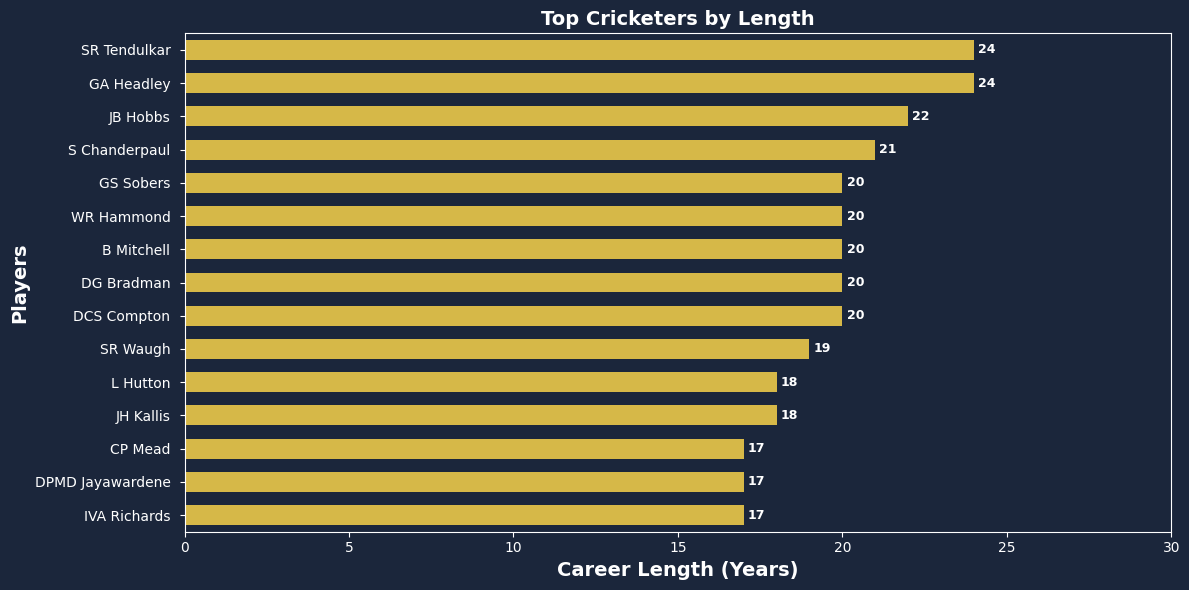

In [349]:
plt.figure(figsize = (12, 6), dpi = 100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})

ax = sns.barplot(data = top_players_by_career_length, x = 'Career_Length', y = 'Player', width = 0.6, color = '#edc531')

for bar in ax.containers:
    ax.bar_label(bar, padding = 3, fontsize = 9, weight = 'bold')

plt.title('Top Cricketers by Length', fontsize = 14, weight = 'bold')
plt.xlabel('Career Length (Years)', fontsize = 14, weight = 'bold')
plt.ylabel('Players', fontsize = 14, weight = 'bold')
plt.xlim(0,30)

plt.tight_layout();

### 7. Highest Innings Score by Country

In [94]:
# Columns['Player', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'Highest_Inns_Score', 'Ave', 'Balls_Faced', 'Batting_Strike_Rate', \
#         '100', '50', '0', '4s', '6s', 'Start Date', 'End Date', 'Country_Code', 'Career_Length']

In [95]:
highest_inns_score_by_country = (
    df.groupby('Country_Code')['Highest_Inns_Score']
    .max()
    .to_frame()
    .reset_index()
)

(0.0, 450.0)

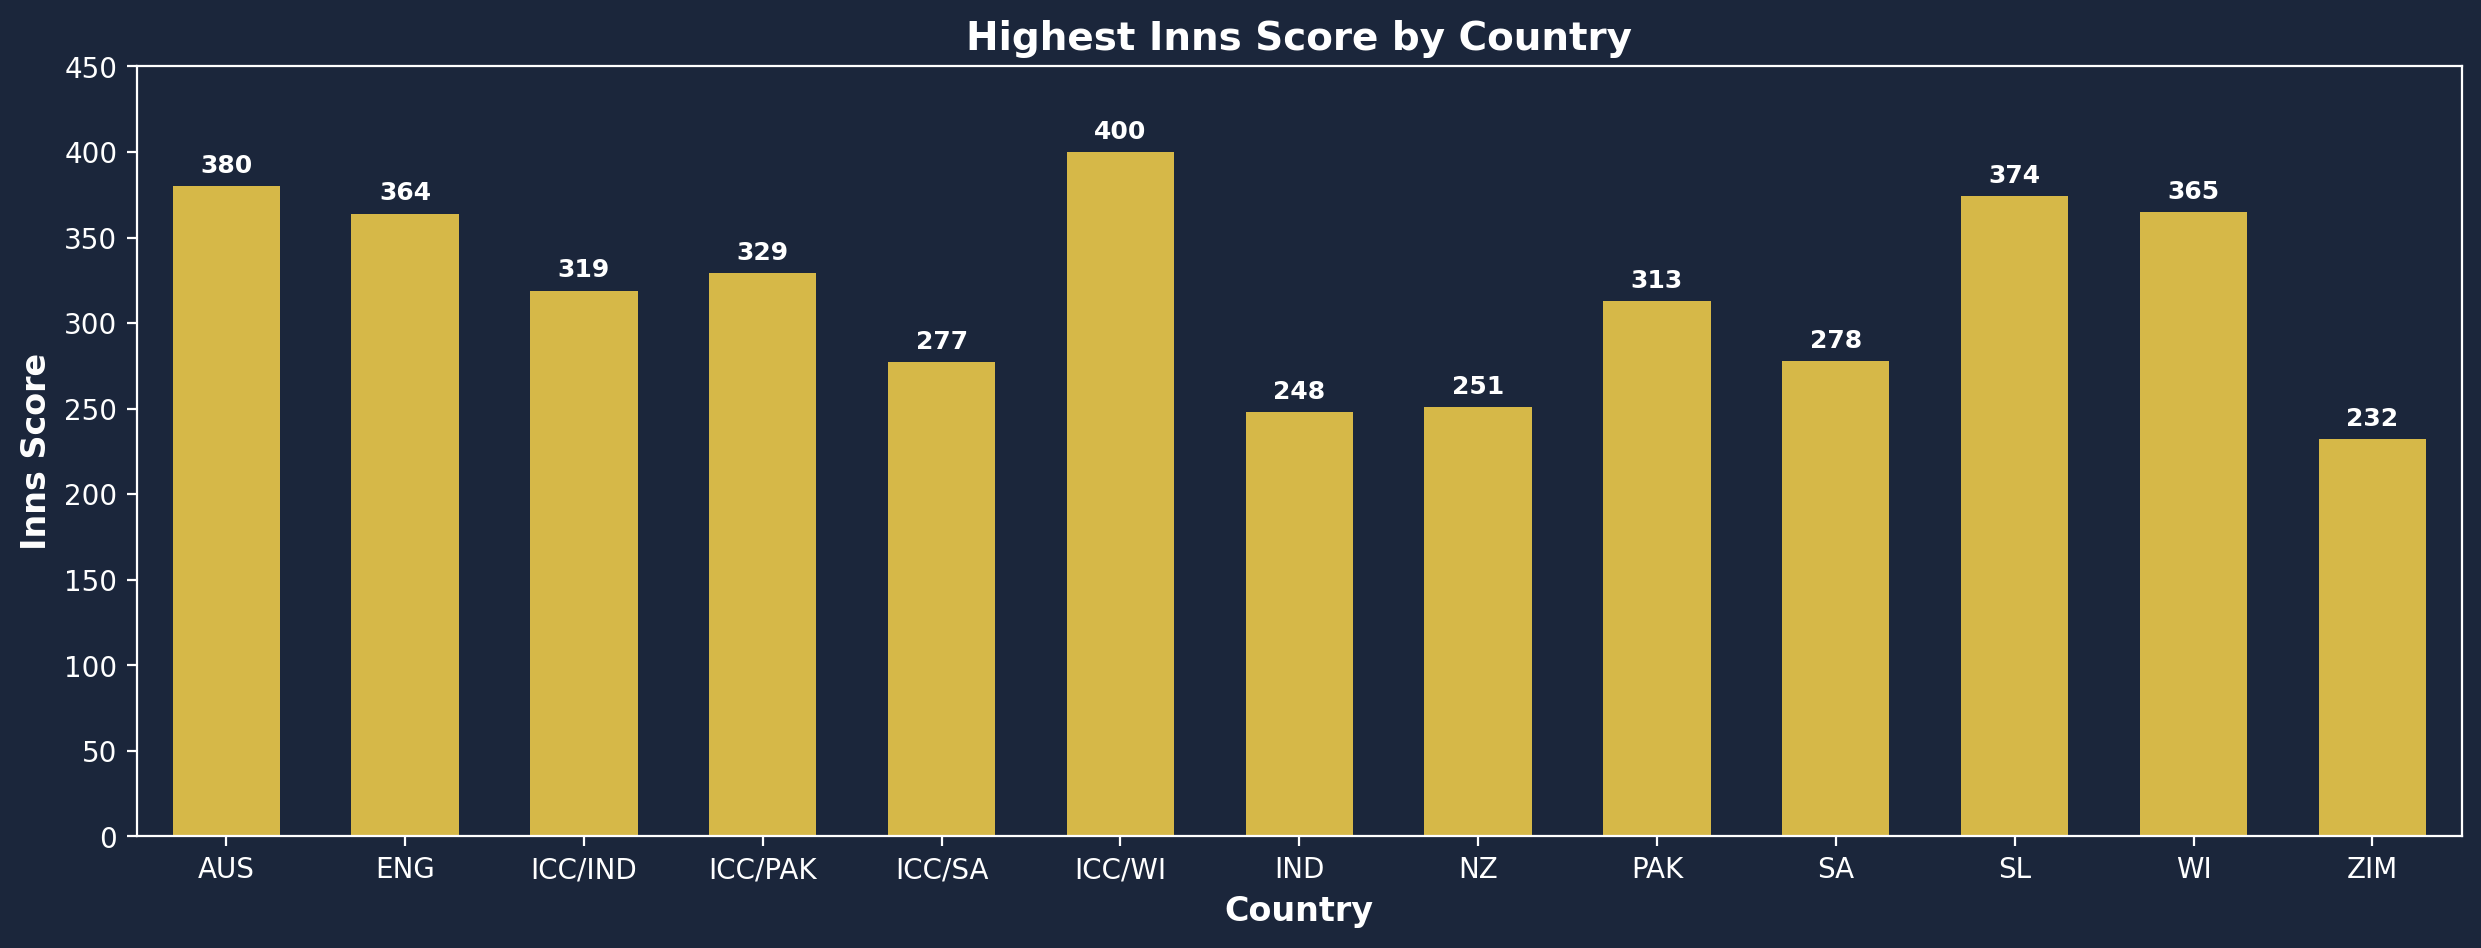

In [305]:
plt.figure(figsize=(15,5), dpi = 200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})

ax = sns.barplot(data = highest_inns_score_by_country, x = 'Country_Code', y = 'Highest_Inns_Score', width = 0.6, color = '#edc531')

for bar in ax.containers:
    ax.bar_label(
        bar,
        padding = 3,
        weight = 'bold',
        fontsize = 9
    )

plt.title('Highest Inns Score by Country', fontsize = 14, weight = 'bold')
plt.xlabel('Country', fontsize = 12, weight = 'bold')
plt.ylabel('Inns Score', fontsize = 12, weight = 'bold')
plt.ylim(0,450)

### 8. Total Runs by Country

In [98]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Start Date,End Date,Country_Code,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


In [99]:
runs_by_country = df.groupby('Country_Code')['Runs'].sum().to_frame().reset_index()

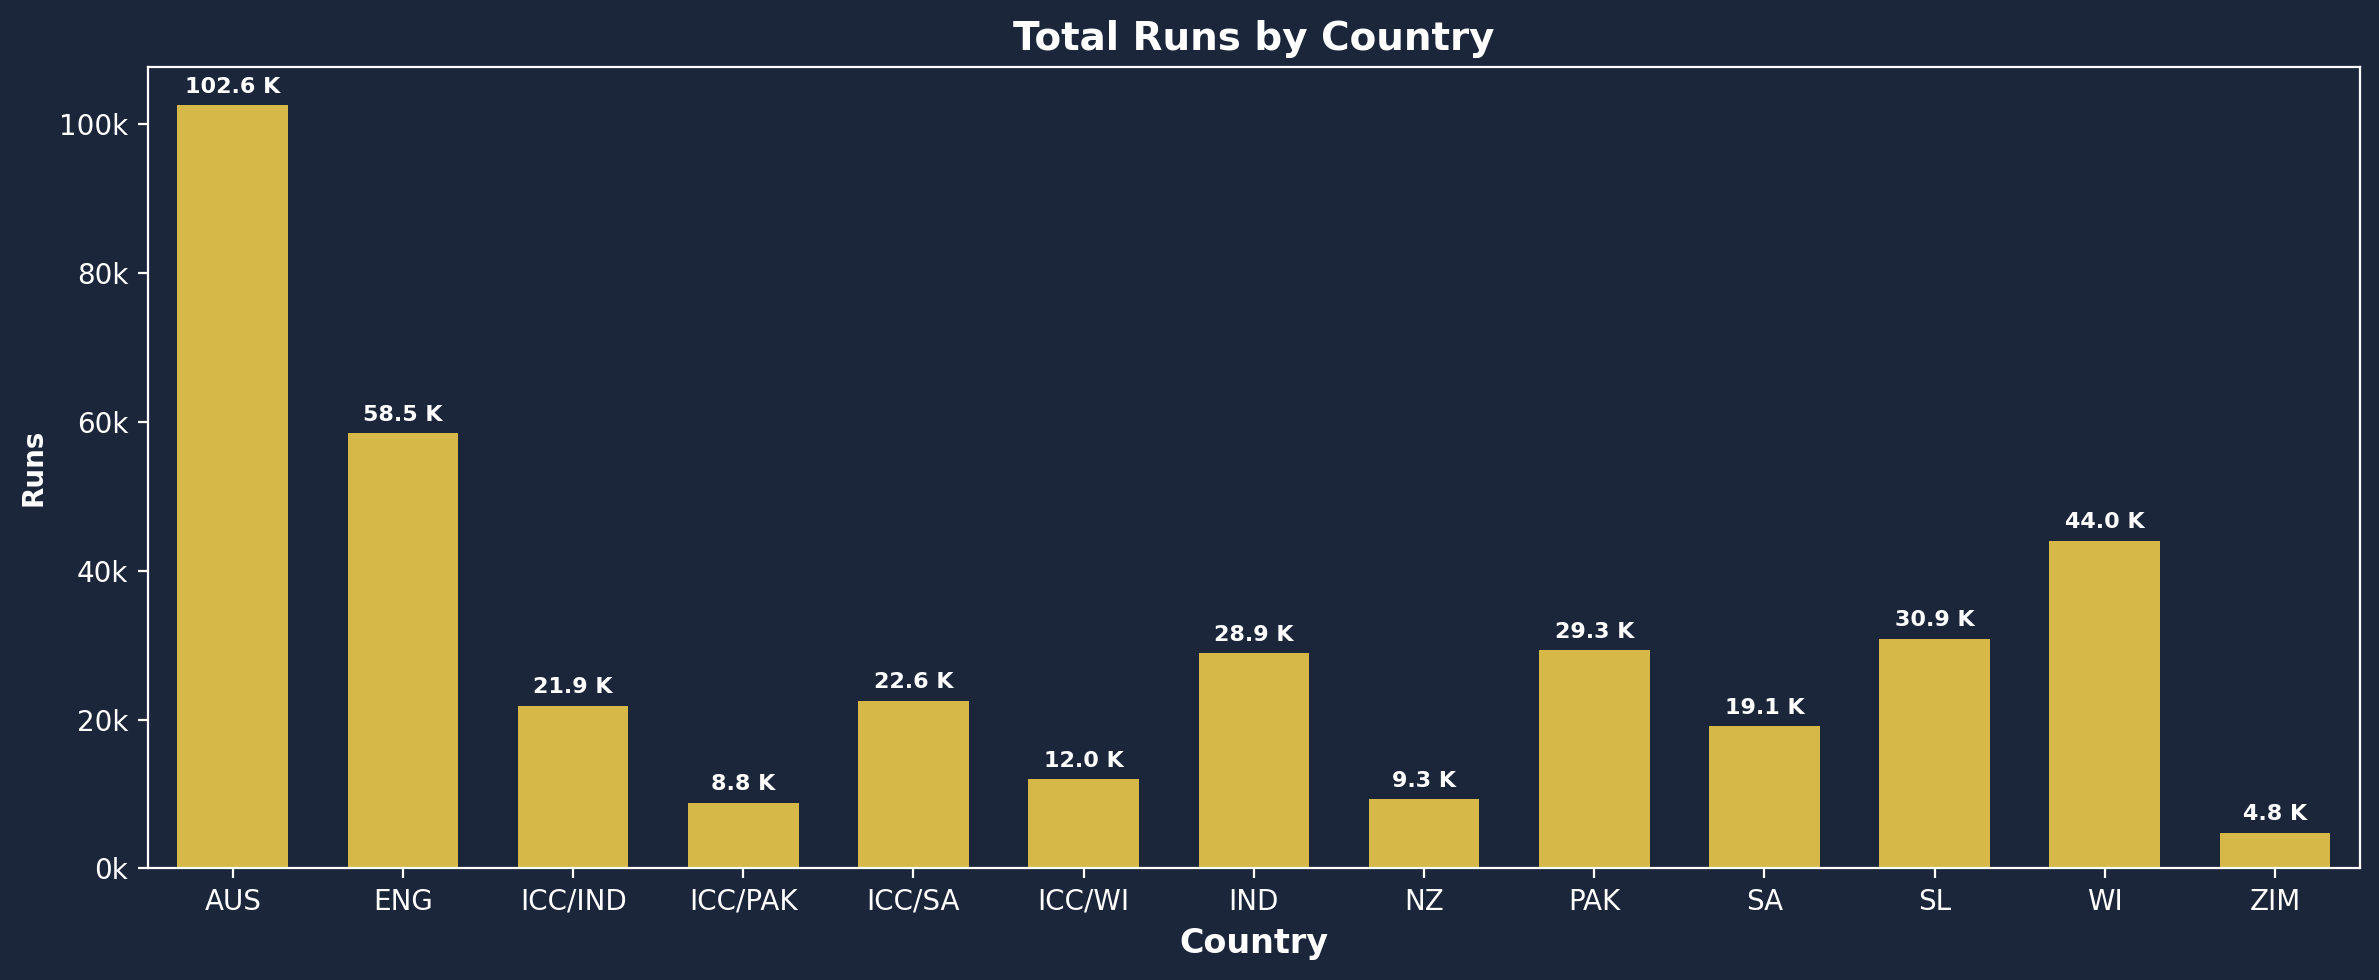

In [307]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12,5), dpi = 200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})

def format_thousands(x):
    return f'{x/1000:.1f} K'

def thousands_formatter(x, pos):    # x: tick value, pos: tick position
    return f'{x/1000:.0f}k'
    
ax = sns.barplot(data = runs_by_country, x = 'Country_Code', y = 'Runs', width = 0.65, color = '#edc531')
ax.bar_label(ax.containers[0], labels=[format_thousands(val.get_height()) for val in ax.containers[0]], weight = 'bold', fontsize = 8, padding = 3)

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.title('Total Runs by Country', fontsize = 14, weight = 'bold')
plt.xlabel('Country', fontsize = 12, weight = 'bold')
# plt.ylabel('Total Runs', fontsize = 12, weight = 'bold')

plt.tight_layout();